In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics


# Introduction

### In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.


In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (5,4)

In [4]:
hf = h5py.File('gammaray_lab4.h5', 'r')


# Problem 1

### In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

### As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

#### 1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

In [5]:
hf.keys()

<KeysViewHDF5 ['data']>

In [6]:
data = np.array(hf.get('data'))


In [7]:
time = data[0,:]
Sphase = data[1,:]
long = data[2,:]
count = data[3,:]

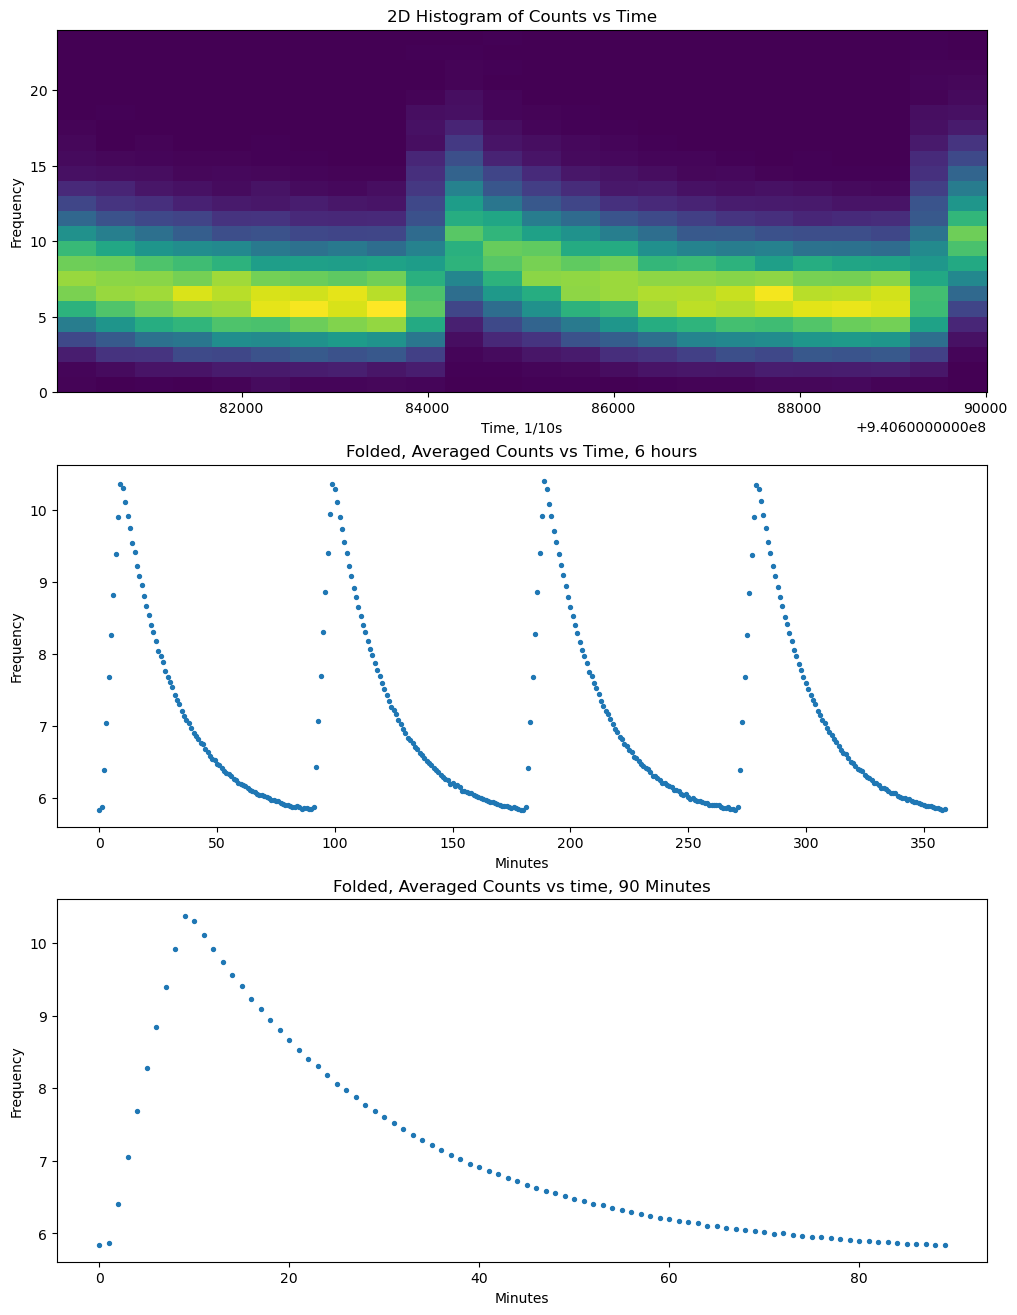

In [8]:
fig, axes = plt.subplots(nrows =3, ncols = 1, figsize = (12,16))
axes[0].hist2d(time[0:100000], count[0:100000], bins = 24)
axes[0].set_title('2D Histogram of Counts vs Time')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Time, 1/10s')


t_1 = time % (5399*4)
binned_stats = stats.binned_statistic(x = t_1, values = count, statistic = ("mean"), bins = 360)
mean = binned_stats.statistic
mean_d =np.sort(mean)[::-1]
x = range(0,360)
axes[1].scatter(x, mean, s = 8)
axes[1].set_title('Folded, Averaged Counts vs Time, 6 hours')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Frequency')


t_1 = time % (5399)
binned_stats = stats.binned_statistic(x = t_1, values = count, statistic = ("mean"), bins = 90)
mean = binned_stats.statistic
mean_d =np.sort(mean)[::-1]
x = range(0,90)
axes[2].scatter(x, mean, s=8)
axes[2].set_title('Folded, Averaged Counts vs time, 90 Minutes')
axes[2].set_xlabel('Minutes')
axes[2].set_ylabel('Frequency')

plt.show()

The data is experiencing periodic increasing and then exponential fall off.

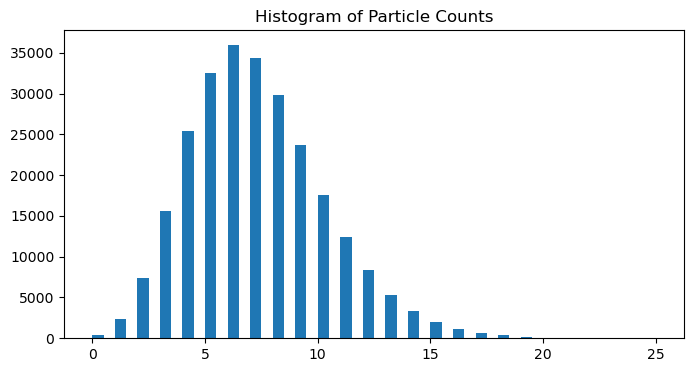

In [9]:
#histogram of every 100th point. Histogram of gamma ray counts
ct10000 = count[::100]
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (8,4))
ax.hist(ct10000, bins = 50)
ax.set_title('Histogram of Particle Counts')
plt.show()

Raw histogram seems to have Poisson distribution.

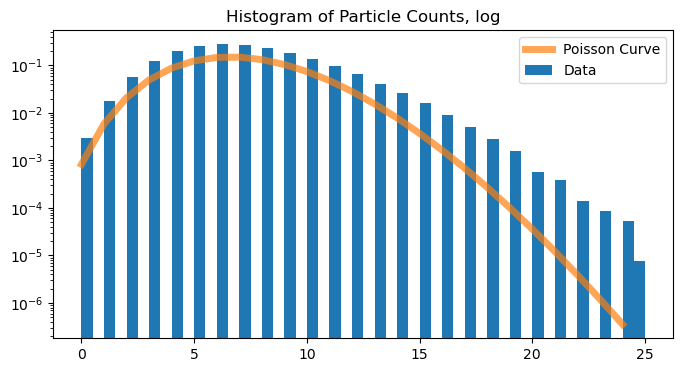

In [10]:
ct10000 = count[::100]
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (8,4))
ax.hist(ct10000, bins = 50, density = True, label = 'Data')
ax.set_title('Histogram of Particle Counts, log')
ax.set_yscale('log')
mu = statistics.mean(ct10000)
x = range(0,25)
ax.plot(x,stats.poisson.pmf(x,mu),linewidth = 5, alpha = 0.7, label = 'Poisson Curve')
ax.legend()

plt.show()

Generated mean with poisson curve does not fit the distrobution in log scale. This data is not poisson

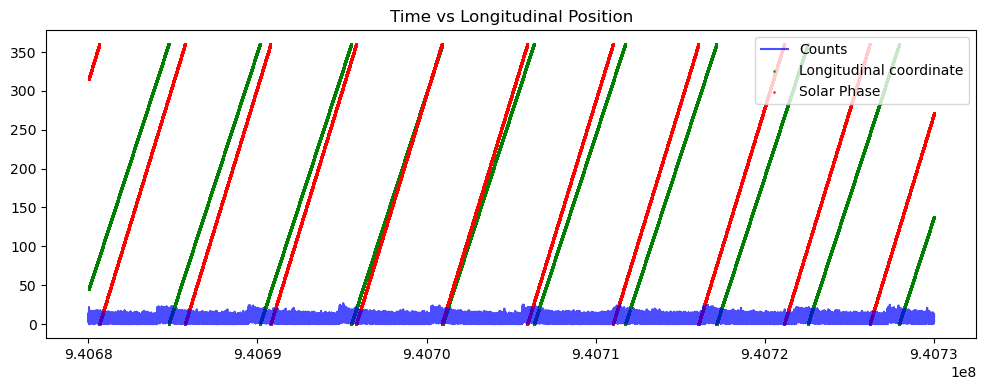

In [11]:
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (12,4))
#Longitude vs time. Constant angular velocity around earth.
plt.scatter(time[0:500000], long[0:500000], s = 1, label = 'Longitudinal coordinate', color ='green', alpha = 0.7)


#solar phase vs time. 
plt.scatter(time[0:500000], Sphase[0:500000], s = 1, label = 'Solar Phase', color = 'red', alpha = 0.7)
plt.title('Time vs Longitudinal Position')

plt.plot(time[0:500000], count[0:500000], color = 'blue', alpha = 0.7, label = 'Counts')
plt.legend(loc = 'upper right')
plt.show()

Solar phase and longitudional position are not equal. Additionally, the gamma ray counts seem to have no dependency on the solar phase, and have a dependency of the Longitudinal Coordinate.

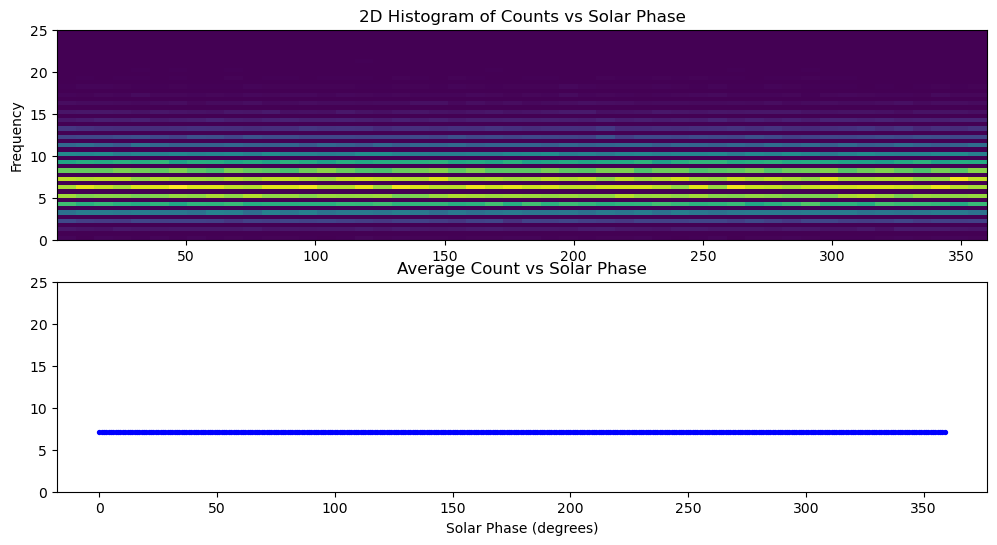

In [12]:
t_1 = time %(5399)
sp10 = Sphase[::100]
count10 = count[::100]
fig, axes = plt.subplots(nrows =2, ncols = 1, figsize = (12,6))

axes[0].hist2d(sp10, count10, bins = 50)
axes[0].set_title('2D Histogram of Counts vs Solar Phase')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Solar Phase (degrees)')

binned_stats = stats.binned_statistic(x = Sphase, values = count, statistic = ("mean"), bins = 360)
mean = binned_stats.statistic
#mean_d =np.sort(mean)[::-1]
x = range(0,360)
axes[1].scatter(x, mean, s = 8, color = 'blue')
axes[1].set_ylim(0,25)
axes[1].set_title('Average Count vs Solar Phase')
plt.show()


There is no relationship between the solar phase and the gamma ray count, which is unusual due to the sun's emission of gamma rays.

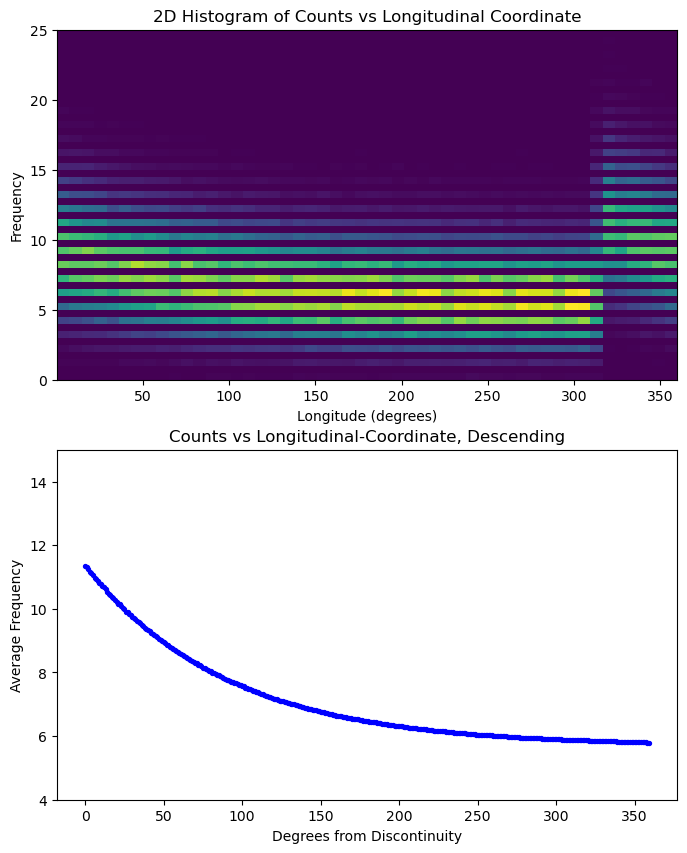

In [13]:
t_1 = time %(5399)
l10 = long[::100]
count10 = count[::100]
fig, axes = plt.subplots(nrows =2, ncols = 1, figsize = (8,10))

axes[0].hist2d(l10, count10, bins = 50)
axes[0].set_title('2D Histogram of Counts vs Longitudinal Coordinate')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Longitude (degrees)')

binned_stats = stats.binned_statistic(x = long, values = count, statistic = ("mean"), bins = 360)
mean = binned_stats.statistic
mean_d =np.sort(mean)[::-1]
x = range(0,360)
axes[1].scatter(x, mean_d, s = 8, color = 'blue')
axes[1].set_ylim(4,15)
axes[1].set_title('Counts vs Longitudinal-Coordinate, Descending')
axes[1].set_ylabel('Average Frequency')
axes[1].set_xlabel('Degrees from Discontinuity')

plt.show()

There is a relationship within the data that the counts depend on the longitudinal coordinate. This was in a way difficult to decipher since the 24hour day is a multiple of the satellite's 90 minute orbit, making for possible relationships between time and gamma rays or location and gamma rays. Upon inspection and some research, the discontinuity near 320 degrees longitude is due to the South Atlantic Anomaly, an area where Earth's inner Van Allen radiation belt comes closest to Earth's surface and which increases flux of gamma rays through that area.

## 2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

The Background changes with respect to longitudinal position. This is due to the South Atlantic Anomaly that increases flux of gamma rays to the region. This alters our distrobution and creates spikes in a periodic pattern. The total data set is near-poisson and may exhibit this distrobution once the altered data is removed.

## 3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

Due to the South Atlantic Anomaly influencing data, we must build a distrobution from locations outside of this region. I will be taking data from longitude 50 to 300, giving the anomalous region plenty of room.
Making a distribuiton that is time dependent, we can consider times outside the South Atlantic Anomaly and the time within it.

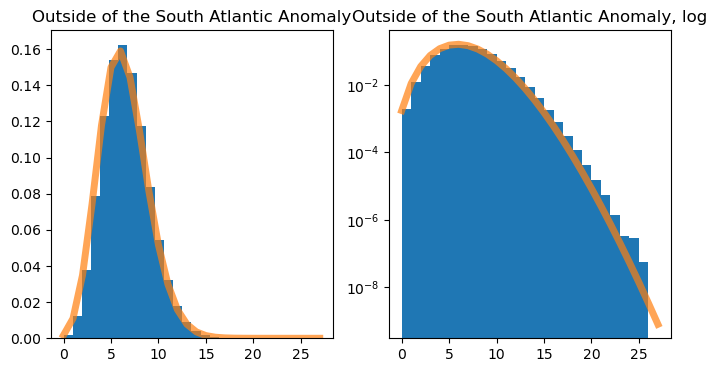

Mean of distrobution is 6.363108069068201


In [14]:
data_filter =(long >50) & (long < 300)
time_clean = time[data_filter]
count_clean = count[data_filter]
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (8,4))

mu = np.mean(count_clean[::100])
x = range(0,28)
ax[0].hist(count_clean,27, density = True)
ax[0].plot(x,stats.poisson.pmf(x,mu),linewidth = 5, alpha = 0.7)
ax[0].set_title('Outside of the South Atlantic Anomaly')

ax[1].hist(count_clean,26, density = True)
ax[1].plot(x,stats.poisson.pmf(x,mu),linewidth = 5, alpha = 0.7)
ax[1].set_yscale('log')
ax[1].set_title('Outside of the South Atlantic Anomaly, log')

plt.show()
print('Mean of distrobution is ' + str(mu))

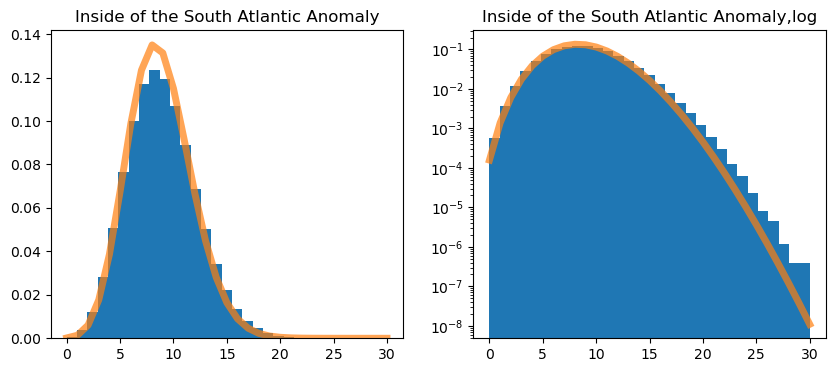

Mean of distrobution is 8.75331102834417


In [15]:
time_dirty = time[np.invert(data_filter)]
count_dirty = count[np.invert(data_filter)]

fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (10,4))

mu = np.mean(count_dirty[::100])
x = range(0,31)
ax[0].hist(count_dirty,31, density = True)
ax[0].plot(x,stats.poisson.pmf(x,mu),linewidth = 5, alpha = 0.7)
ax[0].set_title('Inside of the South Atlantic Anomaly')

ax[1].hist(count_dirty,31, density = True)
ax[1].plot(x,stats.poisson.pmf(x,mu),linewidth = 5, alpha = 0.7)
ax[1].set_yscale('log')
ax[1].set_title('Inside of the South Atlantic Anomaly,log')

plt.show()

print('Mean of distrobution is ' + str(mu))

These curves fit much better than attempting to curve fit the origonal data. However, these are not perfect still as the influence of the South Atlantic Anomaly existed as a curved exponential falling off as a function of distance from that longitudinal coordinate. This cannot be entirely eliminated using the binary 'inside' or 'outside' employed in these plots since both distributions are adding in some capacity over all regions.

## 4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In [102]:
sigma1 = stats.poisson(np.mean(count_clean)).ppf(stats.norm.cdf(5))

sigma2 = stats.poisson(np.mean(count_dirty)).ppf(stats.norm.cdf(5))

print('Required Strength for 5 Simga signal outside of South Atlantic Anomaly: '+str(sigma1) + ' counts/100ms')
print('Required Strength for 5 Simga signal inside of South Atlantic Anomaly: '+str(sigma2) + ' counts/100ms')

Required Strength for 5 Simga signal outside of South Atlantic Anomaly: 22.0 counts/100ms
Required Strength for 5 Simga signal inside of South Atlantic Anomaly: 27.0 counts/100ms


The strength of a signal to reach 5 sigma is higher within the South Atlantic Anomalous zone due to increased flux and intensity of gamma rays in that region.

In [17]:
hf.close()

# Problem 2

### In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

### 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [18]:
hfi = h5py.File('images.h5', 'r')

In [19]:
hfi.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [20]:
image1 = np.array(hfi.get('image1'))
imagestack = np.array(hfi.get('imagestack'))

### 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

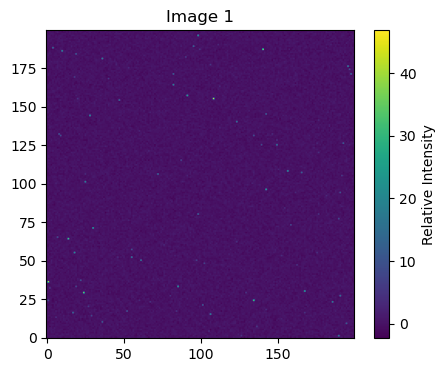

In [25]:
plt.imshow(image1[:, :], origin='lower')
plt.title('Image 1')
colorbar = plt.colorbar()
colorbar.set_label('Relative Intensity')
plt.show()

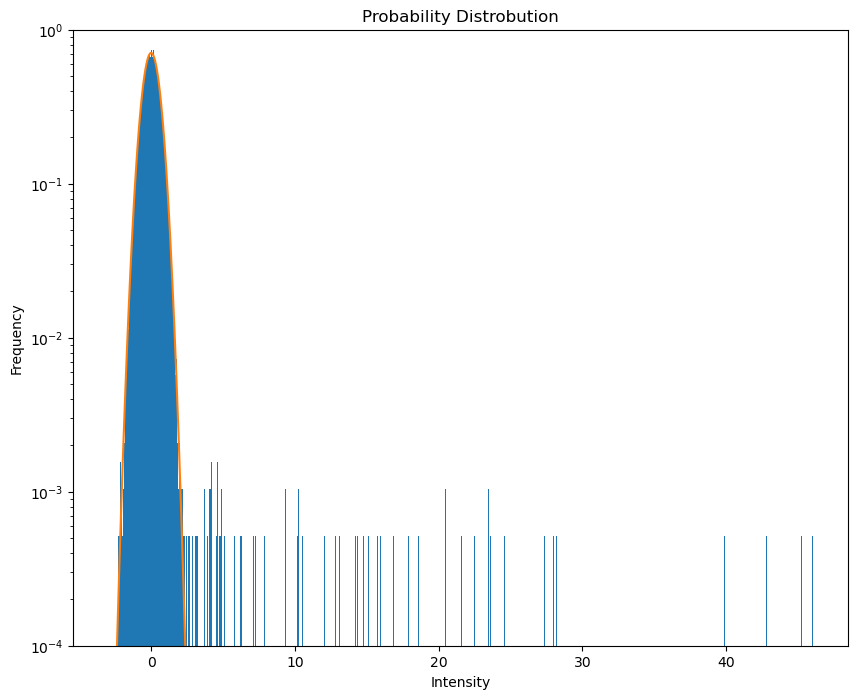

Mean of Gaussian Curve -0.001985276297161106
Standard Deviation of Gaussian curve 0.5639914258833296


In [61]:
plt.rcParams["figure.figsize"] = (10,8)
image1_data = imagestack[:,:,0].flatten()


plt.hist(image1_data,1000, density = True)
plt.yscale('log')
x = np.linspace(-3,3,100)
normdata =(image1_data[image1_data<3])
mean = np.mean(normdata)
std = np.std(normdata)
plt.plot(x, stats.norm.pdf(x,loc = mean,scale = std))
plt.ylim(10e-5,1)

plt.title('Probability Distrobution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

print('Mean of Gaussian Curve '+str(mean))
print('Standard Deviation of Gaussian curve '+str(std))

There is the plot of a single image out of 10. There is some noise showing up outside the distribution. The normal curve represents the black/purple background of space. The noise spikes are the stars within the image showing up as high intensity, narrow band, low frequency points in our PDF function. Next we should average all the images to narrow our distrobution of low intensity points in order to find low intensity stars.

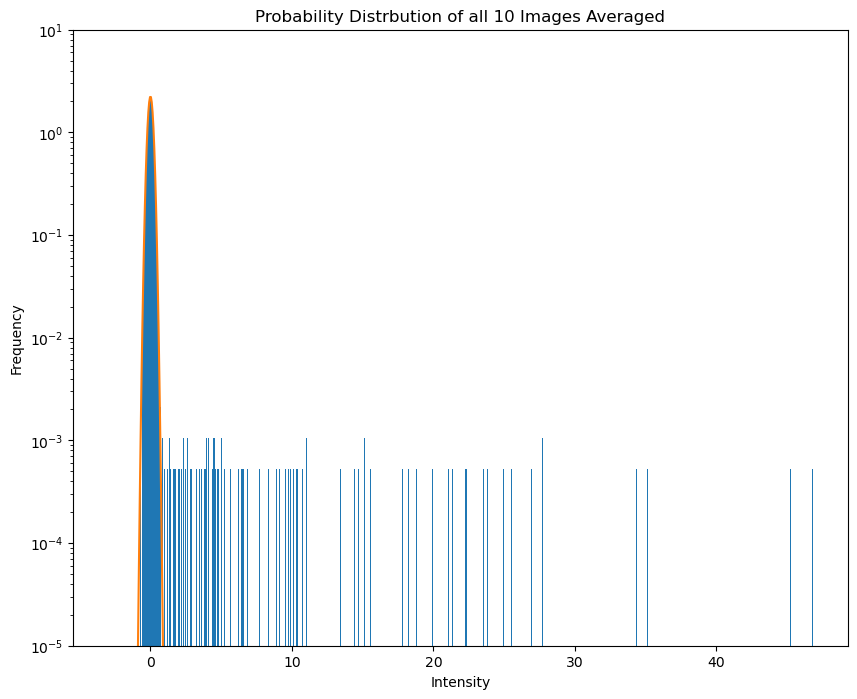

Mean of Gaussian Curve -0.0001292660742716416
Standard Deviation of Gaussian curve 0.1778348962220202


In [85]:
avg_image = np.mean(imagestack, axis = 2)
plt.hist(avg_image.flatten(), bins = 1000, density = True)
plt.yscale('log')

x = np.linspace(-3,3,100)
normdata_avg =(avg_image[avg_image<1])
mean_avg = np.mean(normdata_avg)
std_avg = np.std(normdata_avg)
plt.plot(x, stats.norm.pdf(x,loc = mean_avg,scale = std_avg))
plt.ylim(10e-6,10)

plt.title('Probability Distrbution of all 10 Images Averaged')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

print('Mean of Gaussian Curve '+str(mean))
print('Standard Deviation of Gaussian curve '+str(std))

Through averaging, standard deviation became ~1/3 of its previous value. 

### 3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

Using a statistical certiainty of 5 sigma to determine the faintest points that can be considered a star, we can determine with our distribution the minimum intensity required for the signal to be significant.

In [86]:
min_intensity = stats.norm(mean_avg,std_avg).ppf(stats.norm.cdf(5))
print(min_intensity)

0.8890452150305256


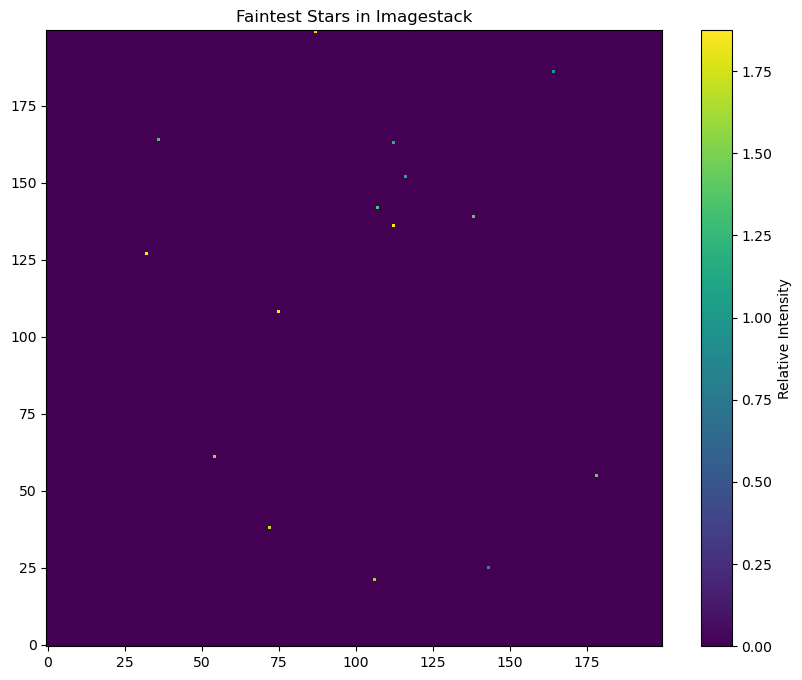

In [93]:
faintstars = (avg_image > min_intensity) & (avg_image < min_intensity+1)
#using min intensity + 1 to determine upper intenstiy threshold for our "faintest" stars
plt.imshow(average_img * faintstars, origin='lower')
plt.title('Faintest Stars in Imagestack')
colorbar = plt.colorbar()
colorbar.set_label('Relative Intensity')

Above is the plot containing only the 15 dimmest stars that have a statistical significance of over 5 sigma. 

In [99]:
hf.close()

### 4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

In [ ]:
Finding the dimmest stars requires evaluating the average while finding a transient event requires subtractively comparing each photo to the average. These are two different data processes that will produce different probability distrobutions. You are evaluating for different events, 